In [18]:
#Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import pathlib
import numpy as np

In [9]:
#Using images of pizza and steak - Food 101 dataset

#listing number of images
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 1 images in pizza_steak
There are 2 directories and 1 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 1 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [11]:
#another way to find image count
num_steak_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_train

750

In [17]:
train_data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in train_data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [38]:
#Visualising the images
def view_random_image(target_dir, target_class):
    target_folder = target_dir + "/" + target_class
    img_path = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder+"/"+img_path[0])
    plt.imshow(img)
    print(img.shape)

(332, 512, 3)


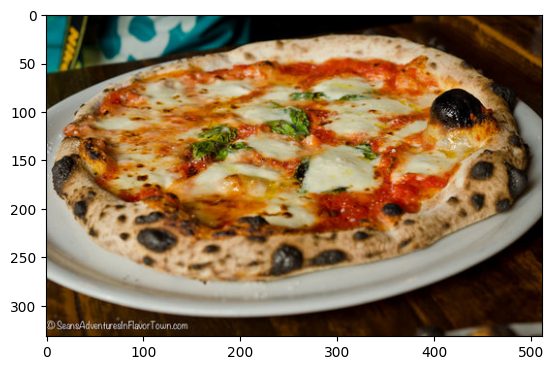

In [39]:
view_random_image("pizza_steak/train","pizza")

(512, 512, 3)


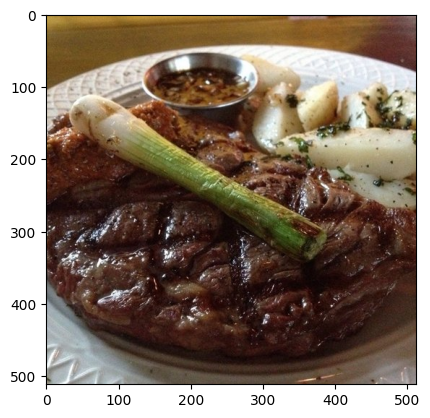

In [28]:
view_random_image("pizza_steak/train", "steak")

In [43]:
#BUILDING AN END-END CNN MODEL
tf.random.set_seed(42)

#Loading in the images
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir,
                                          target_size=(224,224), #(224,244) is more common and enough in practice
                                          batch_size=64,
                                          class_mode="binary")

validation_data = valid_gen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=64,
                                               class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [48]:
#Building a CNN MODEL
#same as Tiny VGG
model_tiny_vgg = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_tiny_vgg.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

history_tiny_vgg = model_tiny_vgg.fit(train_data,
                                     validation_data=validation_data,
                                     epochs=6,
                                     steps_per_epoch=len(train_data),
                                     validation_steps=len(validation_data))

Epoch 1/6


2023-08-14 21:23:14.688324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5969 - accuracy: 0.6940

2023-08-14 21:23:17.776909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 4s 163ms/step - loss: 0.5969 - accuracy: 0.6940 - val_loss: 0.4538 - val_accuracy: 0.7940
Epoch 2/6
24/24 [==============================] - 4s 155ms/step - loss: 0.4656 - accuracy: 0.7920 - val_loss: 0.3911 - val_accuracy: 0.8560
Epoch 3/6
24/24 [==============================] - 4s 155ms/step - loss: 0.4305 - accuracy: 0.8187 - val_loss: 0.3944 - val_accuracy: 0.8320
Epoch 4/6
24/24 [==============================] - 4s 155ms/step - loss: 0.4069 - accuracy: 0.8287 - val_loss: 0.3799 - val_accuracy: 0.8280
Epoch 5/6
24/24 [==============================] - 4s 155ms/step - loss: 0.3934 - accuracy: 0.8227 - val_loss: 0.3700 - val_accuracy: 0.8400
Epoch 6/6
24/24 [==============================] - 4s 153ms/step - loss: 0.3369 - accuracy: 0.8627 - val_loss: 0.3405 - val_accuracy: 0.8580


In [52]:
#Getting the summary of the model
model_tiny_vgg.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

(512, 512, 3)
(382, 512, 3)


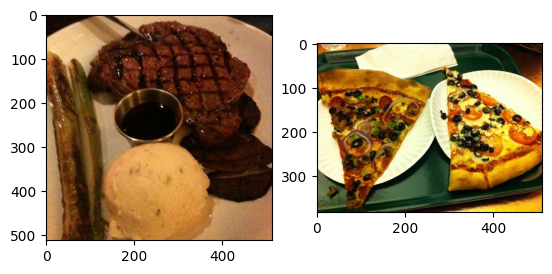

In [57]:
#VISUALISING THE DATA
plt.figure()
plt.subplot(1,2,1)
view_random_image("pizza_steak/train", "steak") #Steak image
plt.subplot(1,2,2)
view_random_image("pizza_steak/train", "pizza") #{izza image}

In [60]:
#LOADING THE DATA

#Defining the directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#Creating the Image Generator - Generates batches of tensor image data with real-time augmentation
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
#rescale changes the pixel value to inbetween 0 and 1

#Using flow from directory to load the images - This is where the actual loading of the images happens
train_data = train_gen.flow_from_directory(train_dir, #path
                                          target_size=(224,224), #Image size (hreight, width)
                                          batch_size=32, #(Size of the batch)No.of images in a single batch
                                          class_mode="binary", #Defines the type of data we wre working with
                                          color_mode="rgb") #Types of colors are "rgb"(default) or "grayscale" 

test_data = test_gen.flow_from_directory(test_dir,
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [72]:
#BUILDING THE BASELINE CNN MODEL

#To make writing code easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

#Creating the baseline model - 3 layer CNN
model_baseline = Sequential([
    #First layer
    Conv2D(filters=10, #No. of filters that pass over an input tensor
           kernel_size=3, #Shape of the filter(typical=3,5,7). Can also be (3,3) [Lower values learn smaller features. Larger value learns larger features]
           input_shape=(224,224,3), #Shape of the image
           strides=1, #Number of steps a filter takes(typical=1,2). Can also be (1,1)
           padding="valid", #Pads the target tensor with zeroes(if "same") to preserve input shape or leaves in the tensor(if "valid") to lower output shape
           activation="relu"),
    #Second layer
    Conv2D(filters=10,
           kernel_size=3, 
           activation="relu"),
    #Third layer
    Conv2D(10, 3, activation="relu"),
    #Flatten layer
    Flatten(),
    #Output Layer
    Dense(1, activation="sigmoid")
])

#Compiling the model
model_baseline.compile(loss="binary_crossentropy", #Since it is a binary classification
                      optimizer=Adam(),
                      metrics=["accuracy"])

#Fitting the model
history_baseline = model_baseline.fit(train_data, #Training data - Combination of images and labels
                                     validation_data=test_data, #Validation Data - Optional
                                     epochs=6, #No. of epochs
                                     steps_per_epoch=len(train_data), #To go through all of the batches
                                     validation_steps=len(test_data))

Epoch 1/6


2023-08-16 19:13:31.818044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.8700 - accuracy: 0.6280

2023-08-16 19:13:34.872451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 4s 82ms/step - loss: 0.8700 - accuracy: 0.6280 - val_loss: 0.5161 - val_accuracy: 0.7600
Epoch 2/6
47/47 [==============================] - 4s 77ms/step - loss: 0.4845 - accuracy: 0.7960 - val_loss: 0.3999 - val_accuracy: 0.8500
Epoch 3/6
47/47 [==============================] - 4s 76ms/step - loss: 0.3141 - accuracy: 0.8700 - val_loss: 0.3968 - val_accuracy: 0.8100
Epoch 4/6
47/47 [==============================] - 4s 77ms/step - loss: 0.1896 - accuracy: 0.9340 - val_loss: 0.3586 - val_accuracy: 0.8380
Epoch 5/6
47/47 [==============================] - 4s 77ms/step - loss: 0.0739 - accuracy: 0.9820 - val_loss: 0.4893 - val_accuracy: 0.8120
Epoch 6/6
47/47 [==============================] - 4s 76ms/step - loss: 0.0311 - accuracy: 0.9927 - val_loss: 0.5400 - val_accuracy: 0.8200


In [68]:
#Getting the model summary - Useful for evaluating the shapes of data in each layer
model_baseline.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_30 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_31 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_8 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


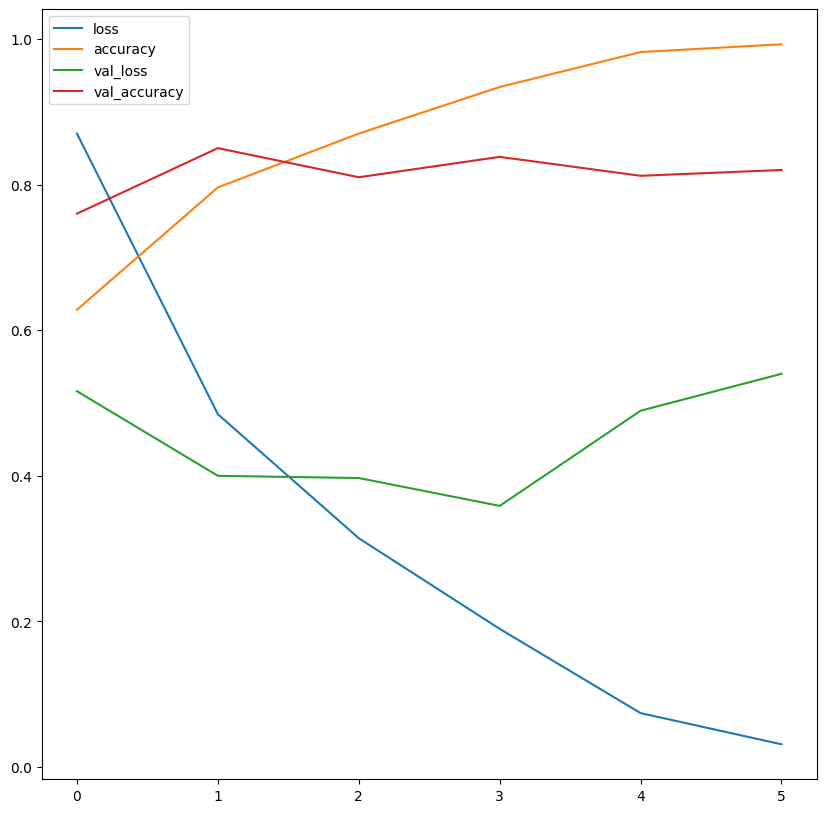

In [74]:
#EVALUATING THE MODEL

#Plotting the loss curves
import pandas as pd
#This takes in all the saved data from history, converts it into a pd dataframe and plots in with legend
pd.DataFrame(history_baseline.history).plot(figsize=(10,10));

In [79]:
#Plotting the validation and training curves separately

#Creating helper functions
def plot_loss_curves(history):
    #Creating a docstring as well
    """
    Returns Separate loss curves for validation metrics
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"])) #Gets the number of epochs
    
    #Plotting loss
    plt.figure(figsize=(10,10))
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Validation Loss")
    plt.title("Loss Curves")
    plt.xlabel("Epochs")
    plt.legend()
    
    #Plotting Accuracy
    plt.figure(figsize=(10,10))
    plt.plot(epochs, acc, label="Training Accuracy")
    plt.plot(epochs, val_acc, label="Validation Accuracy")
    plt.title("Accuracy Curves")
    plt.xlabel("Epochs")
    plt.legend()

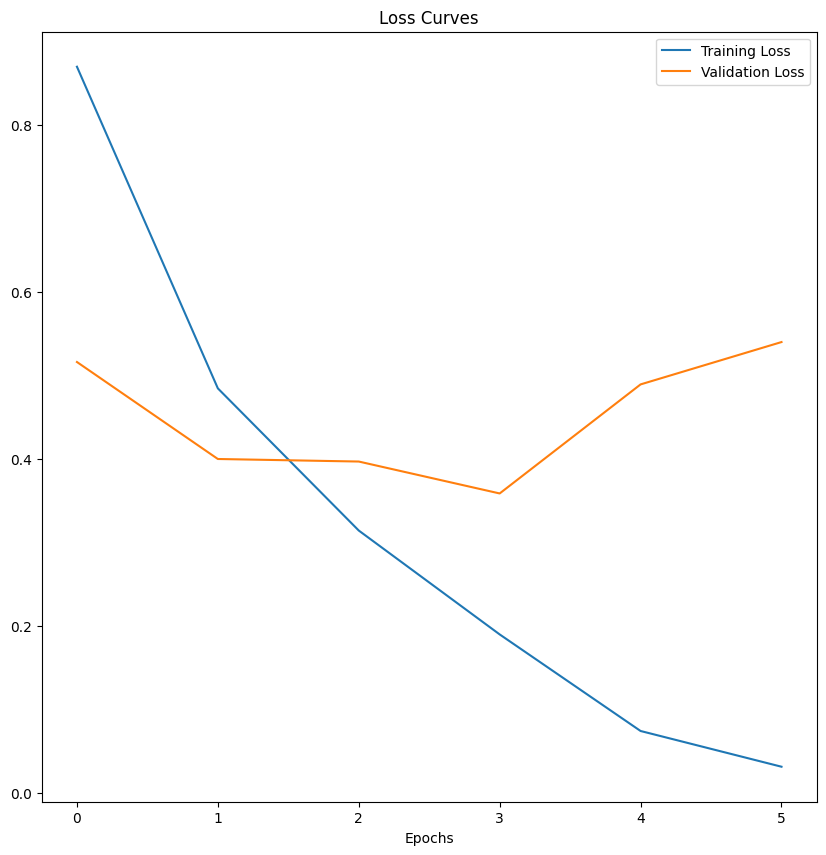

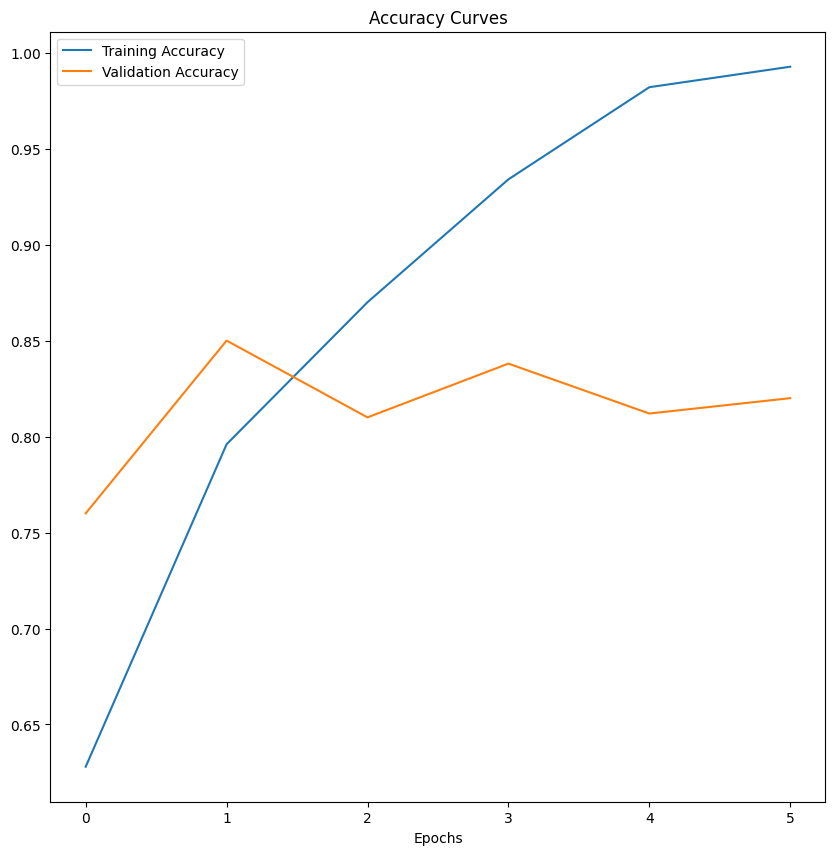

In [80]:
plot_loss_curves(history_baseline)

In [83]:
#REDUCING OVERFITTING(ALSO KNOWN AS REGUALRISATION)

#By Adding regularisation layers - MaxPool2D
model_2 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3), activation="relu"),
    MaxPool2D(pool_size=2), #Default pool size = (2,2)
    Conv2D(10,3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])
model_2.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])
history_2 = model_2.fit(train_data,
                       validation_data=test_data,
                       epochs=6,
                       steps_per_epoch=len(train_data),
                       validation_steps=len(test_data))

Epoch 1/6


2023-08-16 20:31:27.912608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6459 - accuracy: 0.6513

2023-08-16 20:31:31.284649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 83ms/step - loss: 0.6459 - accuracy: 0.6513 - val_loss: 0.4876 - val_accuracy: 0.7760
Epoch 2/6
47/47 [==============================] - 4s 76ms/step - loss: 0.4718 - accuracy: 0.7780 - val_loss: 0.3715 - val_accuracy: 0.8420
Epoch 3/6
47/47 [==============================] - 4s 80ms/step - loss: 0.4183 - accuracy: 0.8187 - val_loss: 0.3577 - val_accuracy: 0.8460
Epoch 4/6
47/47 [==============================] - 4s 80ms/step - loss: 0.3934 - accuracy: 0.8280 - val_loss: 0.3216 - val_accuracy: 0.8600
Epoch 5/6
47/47 [==============================] - 4s 77ms/step - loss: 0.3632 - accuracy: 0.8447 - val_loss: 0.3071 - val_accuracy: 0.8740
Epoch 6/6
47/47 [==============================] - 4s 78ms/step - loss: 0.3586 - accuracy: 0.8473 - val_loss: 0.2993 - val_accuracy: 0.8820


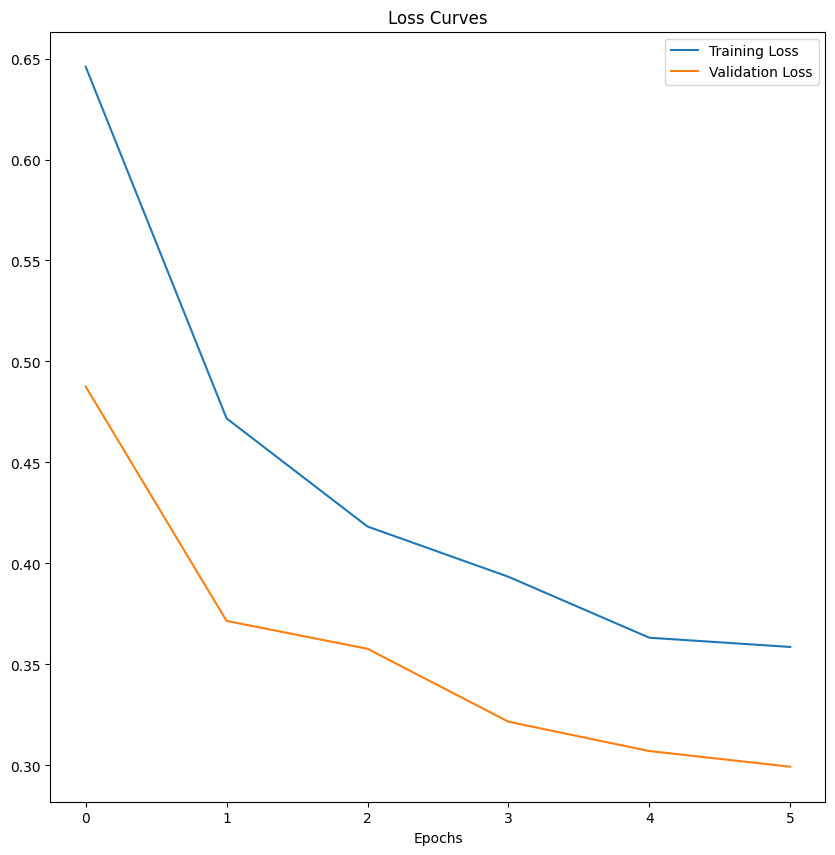

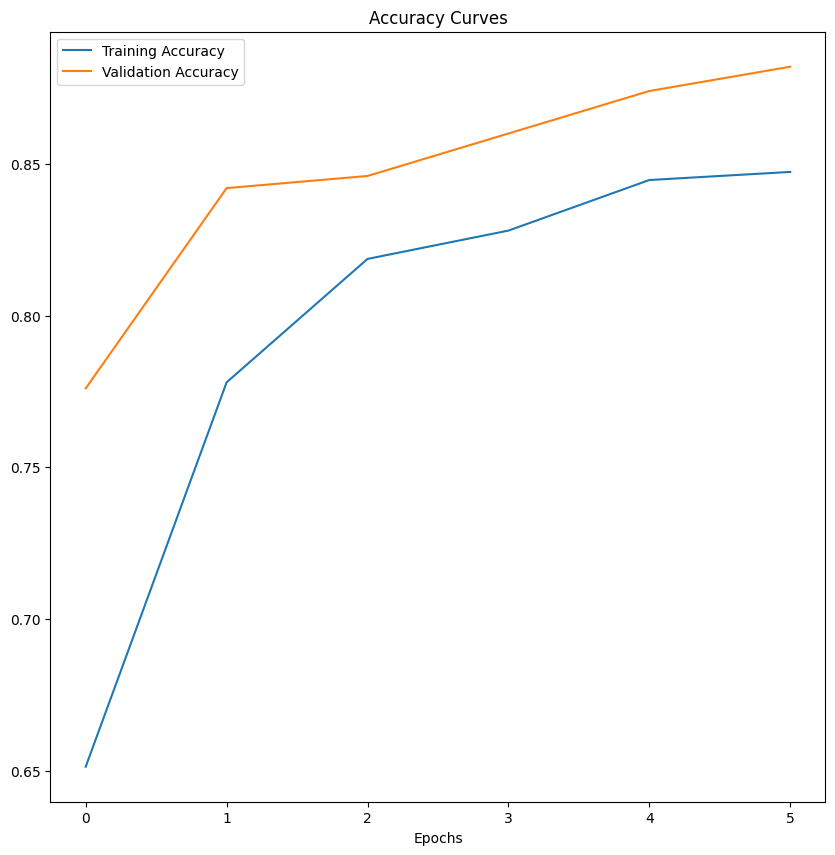

In [84]:
plot_loss_curves(history_2)

In [85]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 26, 26, 10)     

In [90]:
#By Adding Data Augmentation
#Creating ImageDataGenerator with data augmentation
train_gen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                               rotation_range=0.2, 
                                                               shear_range=0.2, 
                                                               zoom_range=0.2,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True)
#Loading in the train dataset with data augmentation
train_data_aug = train_gen_aug.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode="binary",
                                                  shuffle=True)

Found 1500 images belonging to 2 classes.


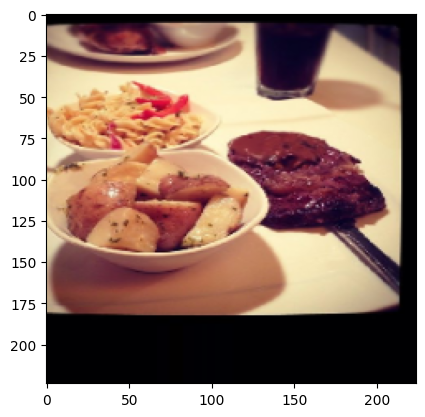

In [94]:
#Visualising the augmented data
augmented_img, label = train_data_aug.next()
plt.imshow(augmented_img[4])

In [97]:
#Training the model with augmented data
model_aug = Sequential([
    Conv2D(10,3, input_shape=(224,224,3), activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_aug.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

history_aug = model_aug.fit(train_data_aug,
                         epochs=6,
                         steps_per_epoch=len(train_data_aug),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/6


2023-08-16 20:56:10.495150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6324 - accuracy: 0.6427

2023-08-16 20:56:20.166271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 11s 223ms/step - loss: 0.6324 - accuracy: 0.6427 - val_loss: 0.5050 - val_accuracy: 0.7420
Epoch 2/6
47/47 [==============================] - 10s 222ms/step - loss: 0.5144 - accuracy: 0.7607 - val_loss: 0.4126 - val_accuracy: 0.8140
Epoch 3/6
47/47 [==============================] - 11s 223ms/step - loss: 0.4766 - accuracy: 0.7827 - val_loss: 0.3764 - val_accuracy: 0.8360
Epoch 4/6
47/47 [==============================] - 11s 226ms/step - loss: 0.4860 - accuracy: 0.7840 - val_loss: 0.3573 - val_accuracy: 0.8340
Epoch 5/6
47/47 [==============================] - 11s 224ms/step - loss: 0.4752 - accuracy: 0.7820 - val_loss: 0.3394 - val_accuracy: 0.8500
Epoch 6/6
47/47 [==============================] - 10s 221ms/step - loss: 0.4459 - accuracy: 0.8087 - val_loss: 0.3743 - val_accuracy: 0.8300


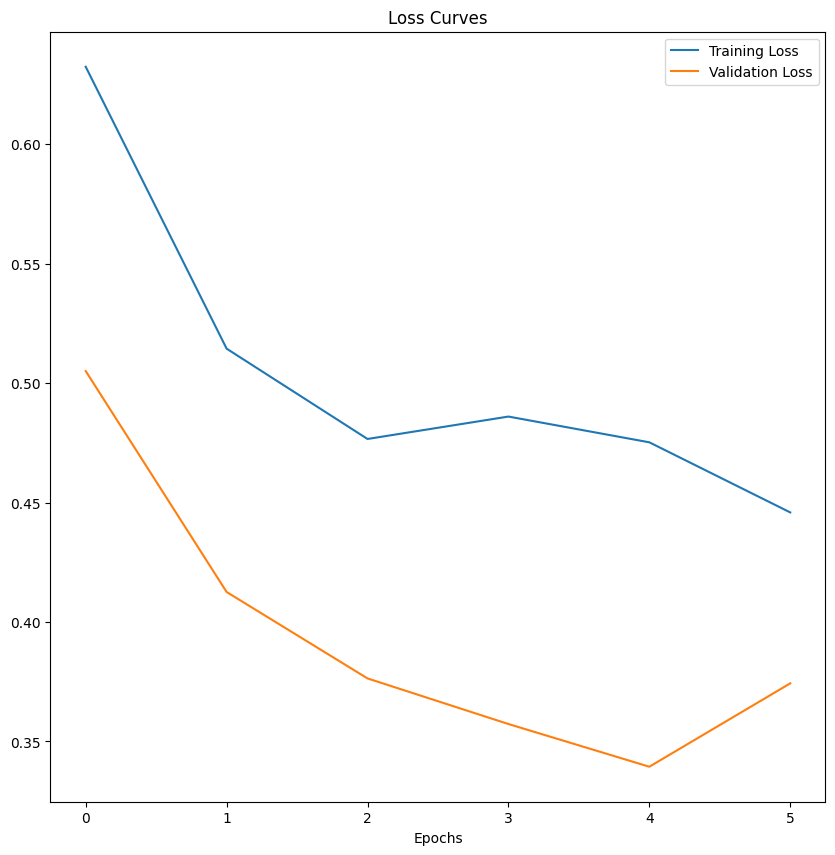

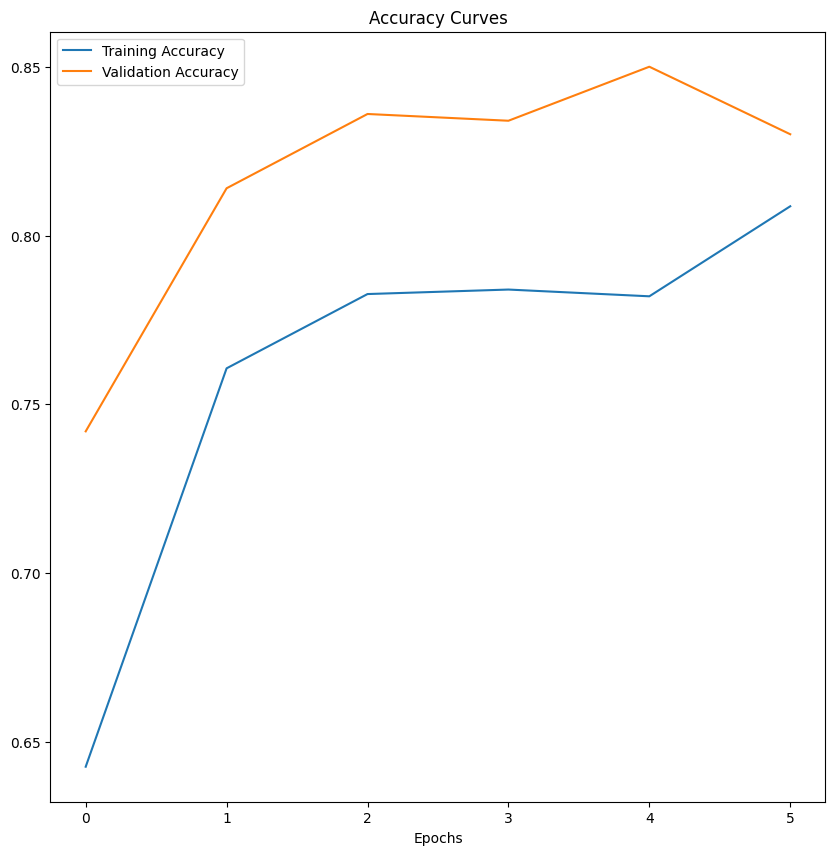

In [98]:
plot_loss_curves(history_aug)

(<matplotlib.image.AxesImage at 0x3aa7a4820>, (4032, 3024, 3))

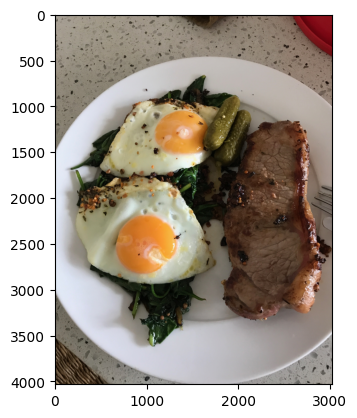

In [107]:
#Making a prediction on custom data

#Importing the image
img_path = "03-steak.jpeg"
img = plt.imread(img_path)
plt.imshow(img), img.shape

In [119]:
img = tf.image.resize(img, [224,224])
model_aug.predict(tf.expand_dims(img, axis=0))

1/1 [==============================] - 0s 14ms/step


array([[1.]], dtype=float32)

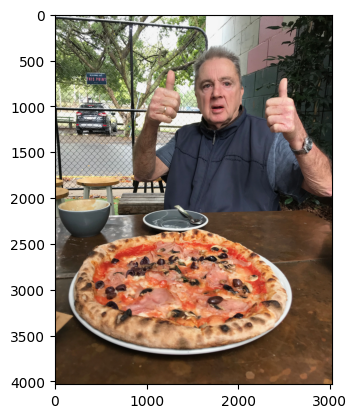

In [115]:
img_pizza = plt.imread("03-pizza-dad.jpeg")
plt.imshow(img_pizza)

In [120]:
img_pizza = tf.image.resize(img_pizza, [224,224])
model_aug.predict(tf.expand_dims(img_pizza, axis=0))

1/1 [==============================] - 0s 12ms/step


array([[0.]], dtype=float32)

In [125]:
###MULTI-CLASS IMAGE CLASSIFICATION

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Importing the dataset
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir,
                                          target_size=(224,224),
                                          batch_size=64,
                                          class_mode="categorical",
                                          color_mode="rgb")
test_data = test_gen.flow_from_directory(test_dir,
                                        target_size=(224,224),
                                        batch_size=64,
                                        class_mode="categorical",
                                        color_mode="rgb")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [127]:
#Building the multi-class CNN model

model_multi = Sequential([
    Conv2D(filters=10, 
           kernel_size=3,
          input_shape=(224,224,3),
          activation="relu"),
    Conv2D(filters=10,
           kernel_size=3, 
           activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10,
           kernel_size=3, 
           activation="relu"),
    Conv2D(filters=10,
          kernel_size=3,
          activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation="softmax"),
])

model_multi.compile(loss="categorical_crossentropy",
                   optimizer=Adam(),
                   metrics=["accuracy"])

history_multi = model_multi.fit(train_data,
                               validation_data=test_data,
                               epochs=6,
                               steps_per_epoch=len(train_data),
                               validation_steps=len(test_data))

Epoch 1/6


2023-08-18 18:41:41.328977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - ETA: 0s - loss: 2.2241 - accuracy: 0.1679

2023-08-18 18:41:56.036596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 20s 163ms/step - loss: 2.2241 - accuracy: 0.1679 - val_loss: 2.0938 - val_accuracy: 0.2380
Epoch 2/6
118/118 [==============================] - 19s 157ms/step - loss: 1.9892 - accuracy: 0.2961 - val_loss: 1.8742 - val_accuracy: 0.3408
Epoch 3/6
118/118 [==============================] - 18s 155ms/step - loss: 1.7646 - accuracy: 0.3913 - val_loss: 1.8617 - val_accuracy: 0.3488
Epoch 4/6
118/118 [==============================] - 19s 163ms/step - loss: 1.5050 - accuracy: 0.4952 - val_loss: 1.8770 - val_accuracy: 0.3448
Epoch 5/6
118/118 [==============================] - 19s 157ms/step - loss: 1.1183 - accuracy: 0.6300 - val_loss: 2.2017 - val_accuracy: 0.3116
Epoch 6/6
118/118 [==============================] - 19s 158ms/step - loss: 0.6779 - accuracy: 0.7865 - val_loss: 2.5714 - val_accuracy: 0.3048


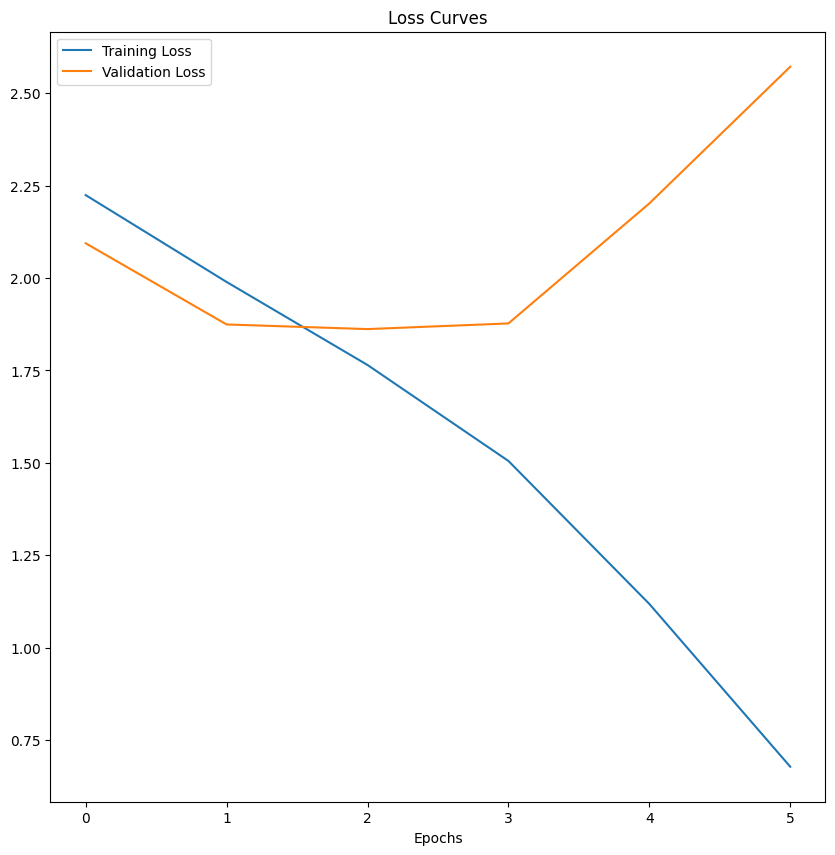

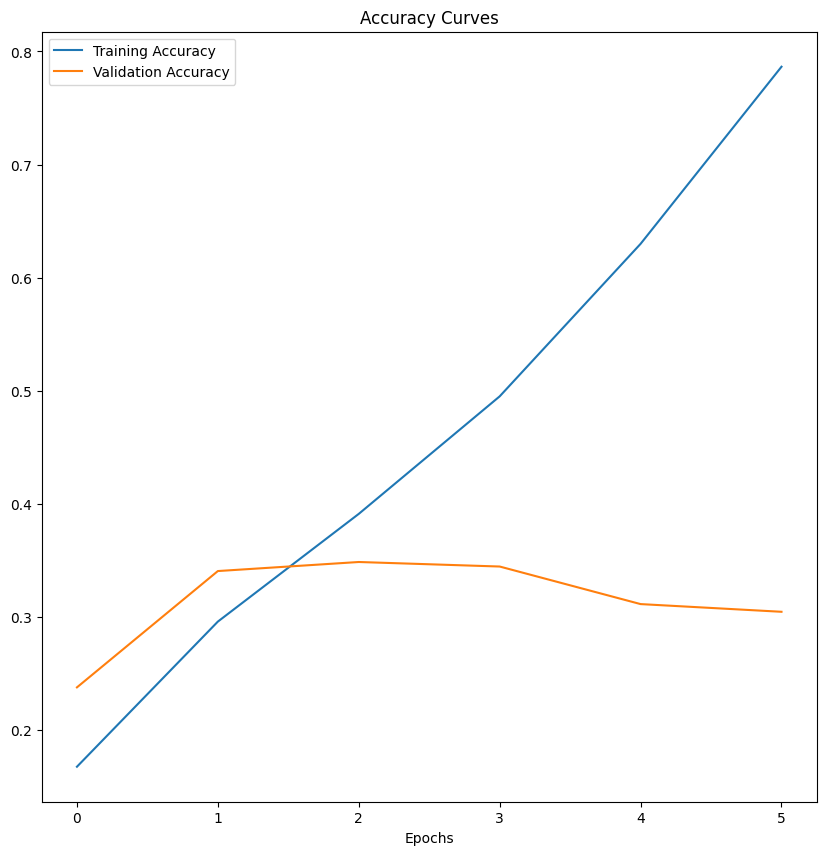

In [128]:
#Evaluating the model
plot_loss_curves(history_multi)

In [129]:
model_multi.evaluate(test_data)

40/40 [==============================] - 5s 116ms/step - loss: 2.5714 - accuracy: 0.3048


[2.571438789367676, 0.30480000376701355]

In [132]:
model_multi.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_48 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_50 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [131]:
#The above model is clearly overfitting

#Reducing overfitting - By removing layers
model_multi_2 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3), activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation="softmax")
])

model_multi_2.compile(loss="categorical_crossentropy",
                     optimizer=Adam(),
                     metrics=["accuracy"])

history_multi_2 = model_multi_2.fit(train_data,
                                   validation_data=test_data,
                                   epochs=6,
                                   steps_per_epoch=len(train_data),
                                   validation_steps=len(test_data))

Epoch 1/6


2023-08-18 18:55:27.529534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - ETA: 0s - loss: 2.1848 - accuracy: 0.2168

2023-08-18 18:55:41.721227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 19s 158ms/step - loss: 2.1848 - accuracy: 0.2168 - val_loss: 2.0037 - val_accuracy: 0.2804
Epoch 2/6
118/118 [==============================] - 18s 156ms/step - loss: 1.8084 - accuracy: 0.3820 - val_loss: 1.9173 - val_accuracy: 0.3248
Epoch 3/6
118/118 [==============================] - 18s 156ms/step - loss: 1.4435 - accuracy: 0.5281 - val_loss: 1.9735 - val_accuracy: 0.3156
Epoch 4/6
118/118 [==============================] - 18s 156ms/step - loss: 1.0294 - accuracy: 0.6861 - val_loss: 2.2050 - val_accuracy: 0.2932
Epoch 5/6
118/118 [==============================] - 19s 157ms/step - loss: 0.6679 - accuracy: 0.8055 - val_loss: 2.5041 - val_accuracy: 0.2904
Epoch 6/6
118/118 [==============================] - 18s 154ms/step - loss: 0.3916 - accuracy: 0.9035 - val_loss: 2.8856 - val_accuracy: 0.2848


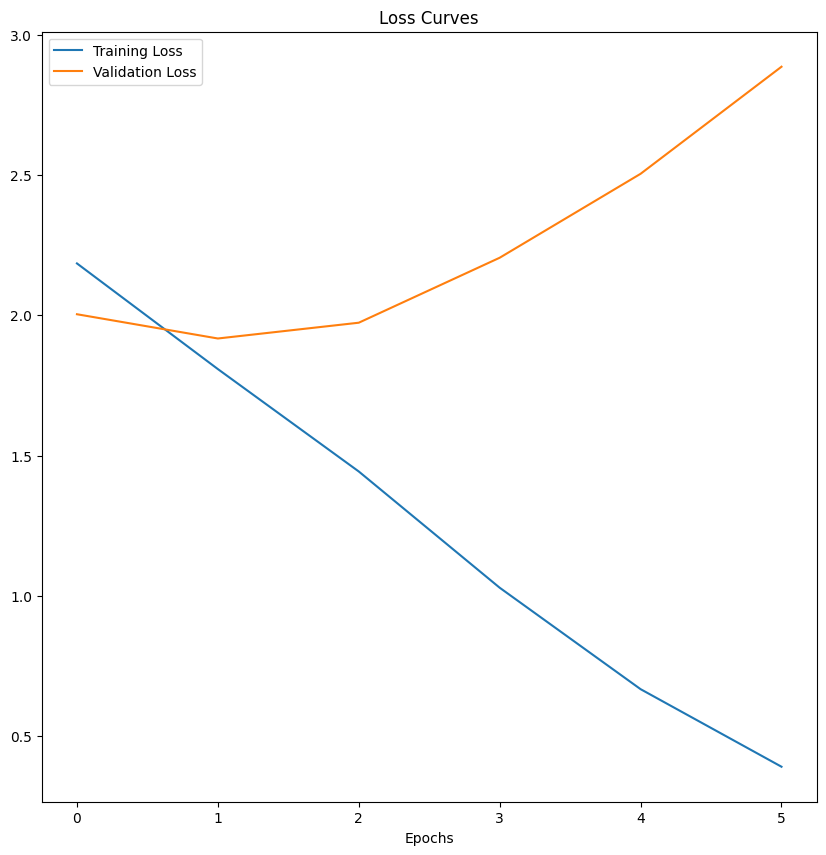

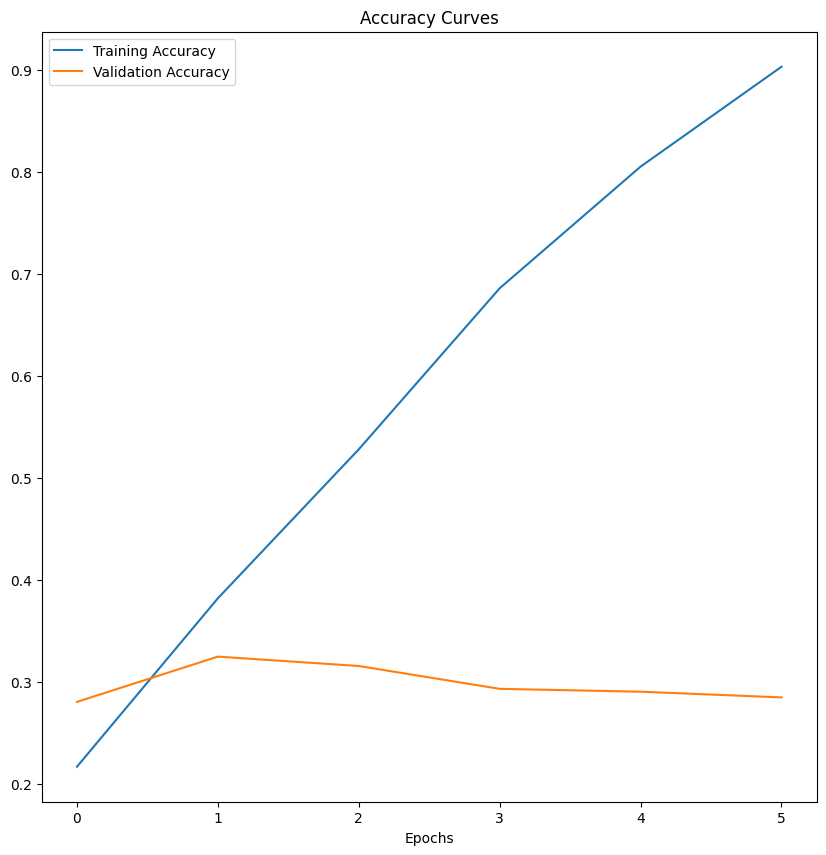

In [133]:
plot_loss_curves(history_multi_2)

In [134]:
model_multi_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 29160)             0         
                                                                 
 dense_16 (Dense)            (None, 10)              

In [138]:
#Trying to reduce overfitting using data augmentation
train_gen_aug = ImageDataGenerator(rescale=1./255,
                              horizontal_flip=True,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rotation_range=0.2)

train_data_aug = train_gen_aug.flow_from_directory(train_dir,
                                                   target_size=(224,224),
                                                   batch_size=64,
                                                   class_mode="categorical",
                                                   shuffle=True)

Found 7500 images belonging to 10 classes.


In [141]:
#Cloning a model
model_multi_aug = tf.keras.models.clone_model(model_multi)
model_multi_aug.compile(loss="categorical_crossentropy",
                       optimizer=Adam(),
                       metrics=["accuracy"])
history_multi_aug = model_multi_aug.fit(train_data_aug,
                                       validation_data=test_data,
                                       epochs=5,
                                       steps_per_epoch=len(train_data),
                                       validation_steps=len(test_data))

Epoch 1/5


2023-08-18 19:06:03.521241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - ETA: 0s - loss: 2.1960 - accuracy: 0.2084

2023-08-18 19:06:49.759647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 51s 430ms/step - loss: 2.1960 - accuracy: 0.2084 - val_loss: 1.9919 - val_accuracy: 0.2912
Epoch 2/5
118/118 [==============================] - 51s 431ms/step - loss: 1.9995 - accuracy: 0.2936 - val_loss: 1.9249 - val_accuracy: 0.3324
Epoch 3/5
118/118 [==============================] - 51s 434ms/step - loss: 1.9389 - accuracy: 0.3232 - val_loss: 1.8665 - val_accuracy: 0.3380
Epoch 4/5
118/118 [==============================] - 52s 440ms/step - loss: 1.8658 - accuracy: 0.3585 - val_loss: 1.8200 - val_accuracy: 0.3768
Epoch 5/5
118/118 [==============================] - 51s 433ms/step - loss: 1.8142 - accuracy: 0.3781 - val_loss: 1.7969 - val_accuracy: 0.3816


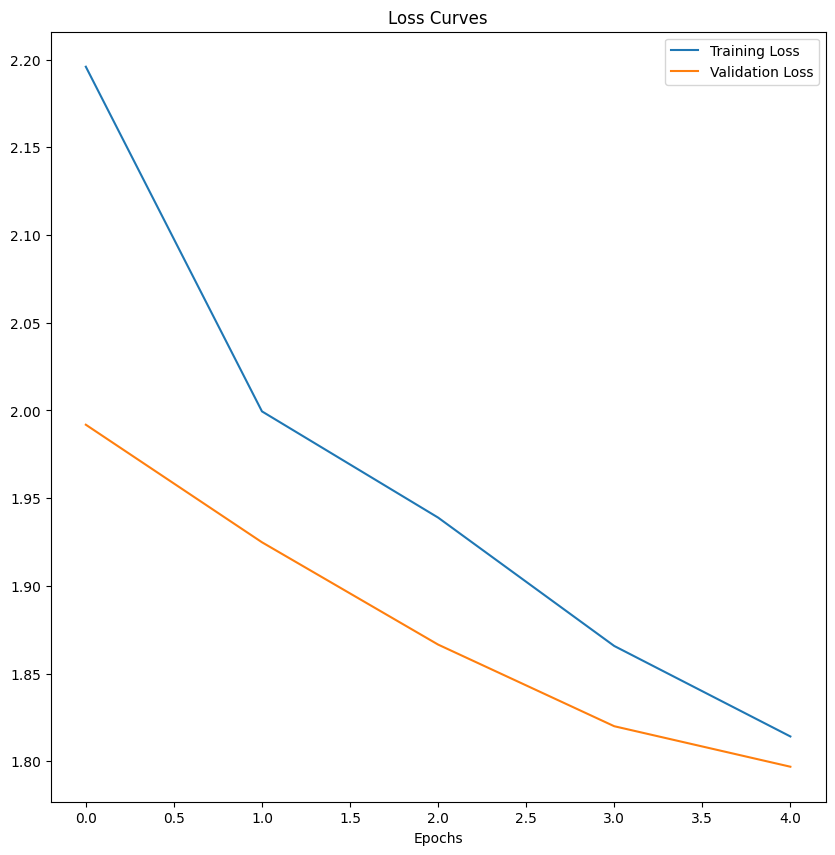

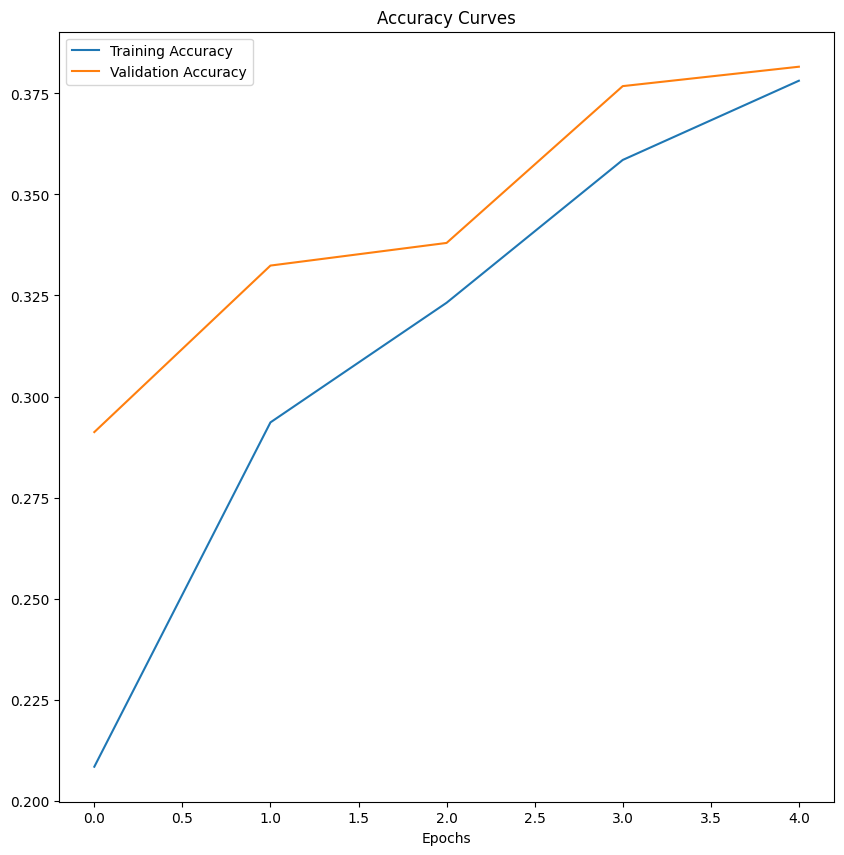

In [142]:
plot_loss_curves(history_multi_aug)

In [143]:
model_multi_aug.evaluate(test_data)

40/40 [==============================] - 5s 113ms/step - loss: 1.7969 - accuracy: 0.3816


[1.7969197034835815, 0.3815999925136566]

In [144]:
#Saving the model
model_multi_aug.save("multi-class-cnn")

INFO:tensorflow:Assets written to: multi-class-cnn/assets


INFO:tensorflow:Assets written to: multi-class-cnn/assets


In [145]:
#Loading a saved model
loaded_model = tf.keras.models.load_model("multi-class-cnn")
loaded_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_48 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_50 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [148]:
loaded_model.evaluate(test_data), model_multi_aug.evaluate(test_data)

40/40 [==============================] - 5s 114ms/step - loss: 1.7969 - accuracy: 0.3816


([1.7969200611114502, 0.3815999925136566],
 [1.7969202995300293, 0.3815999925136566])